In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from src.OED import OED, OEDGymConfig
from src.DQN import DQN_OED
from pde.AdvectionEquation import *

In [12]:
seed = 0
adv_config = Adv2dModelConfig()
adv_eq = Advection2D(adv_config)

In [13]:
gym_config = OEDGymConfig()
gym_config.n_max = 500
gym_config.max_horizon = 500
gym_config.n_sensor = 2
adv_dqn = DQN_OED(seed, pde_system=adv_eq, gym_config=gym_config, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [14]:
gym_env = adv_dqn.env

In [11]:
gym_env.pde_field.shape

(50, 50, 2500)

In [15]:
gym_env.solution_data.shape

(2500, 2500)

In [27]:
sensor_positions = [(np.int64(13), np.int64(24)), (np.int64(15), np.int64(19)), (np.int64(25), np.int64(26)), (np.int64(31), np.int64(40)), (np.int64(42), np.int64(24))]

In [28]:
sensor_positions

[(np.int64(13), np.int64(24)),
 (np.int64(15), np.int64(19)),
 (np.int64(25), np.int64(26)),
 (np.int64(31), np.int64(40)),
 (np.int64(42), np.int64(24))]

In [29]:
sensor_idx = [r * gym_env.ny + c for r, c in sensor_positions]

In [32]:
Q_m = gym_env.modes[sensor_idx, :]
# T_m = Q_m.T @ Q_m # Symmetric matrix
reward = np.linalg.det(Q_m.T @ Q_m)

In [33]:
reward

np.float64(-5.700082941657193e-108)

In [234]:
sensor_indices = [10, 500, 2000, 1200]

In [240]:
rew_new = RewardCalculator(gym_env.pde_field, 100)

In [241]:
rew_new.modes.shape

(100, 2500)

In [230]:
selected_sensors_matrix = rew_new.modes[sensor_indices, :]

In [231]:
res = selected_sensors_matrix @ selected_sensors_matrix.T

In [232]:
res.shape

(5, 5)

In [233]:
selected_sensors_matrix.shape

(5, 100)

In [237]:
temp = reward_calc.selected_modes_pca[sensor_indices, :]

In [238]:
res = temp @ temp.T

In [239]:
res.shape

(4, 4)

In [215]:
# plt.imshow(gym_env.pde_field[:, :, 401].T)

In [235]:
reward_calc = gym_env.reward_calculator

In [217]:
sol_data = reward_calc.solution_data

In [182]:
X = sol_data.reshape(reward_calc.nx * reward_calc.ny, reward_calc.timesteps).T

In [183]:
X.shape

(2500, 2500)

In [184]:
from sklearn.decomposition import PCA

In [185]:
energy_threshold = 0.99

In [190]:
pca = PCA(n_components=100, svd_solver='full')
pca.fit(X)

PCA(n_components=100, svd_solver='full')

In [249]:
modes = gym_env.modes

In [250]:
modes.shape

(2500, 100)

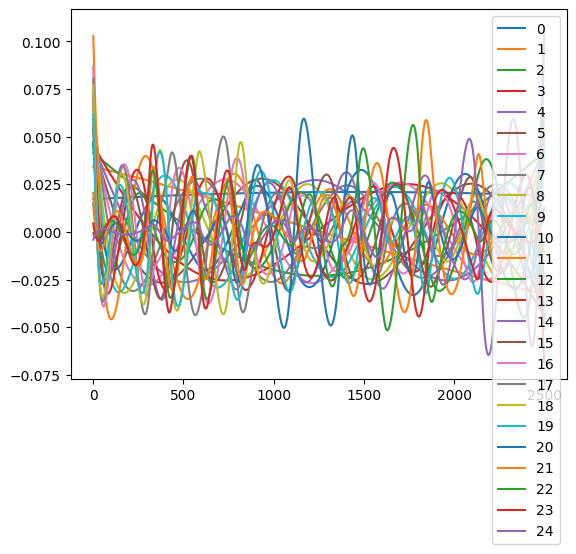

In [254]:
for i in range(25):
    plt.plot(modes[:, i], label=str(i))
plt.legend()